our typical pytorch pipeline consists of three steps
1) Design model (input,output size,forward pass)
2) construct loss and optimizer
3) training loop


-- forward pass : comopute prediction

-- backward pass: gradients calculations

-- update weights

 from training loop  to last we do cople of times untill we are done

In [13]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


In [14]:
# 0) Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape


in the above cell X_numpu and y_numpy is of double type. so need to change types into float to avoid errors in future.

we also reshaped y because it is a  row and we want to make it a column vector.So we want to put each value in one row. the whole shape is only one column



in case of linear regression there is only one layer . therefore we can use pytorch built in model. Or we can define our own model

In [15]:
# 1) Model
# Linear model f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [16]:
# 2) Loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  


In [17]:
# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 3993.5115
epoch: 20, loss = 2816.3501
epoch: 30, loss = 2013.7097
epoch: 40, loss = 1466.3198
epoch: 50, loss = 1092.9315
epoch: 60, loss = 838.1828
epoch: 70, loss = 664.3433
epoch: 80, loss = 545.6931
epoch: 90, loss = 464.6960
epoch: 100, loss = 409.3932


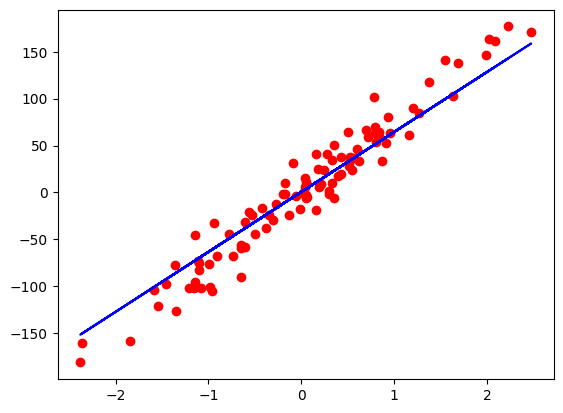

In [18]:
# Plot
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy,predicted, 'b')
plt.show()

in the above predicted is a tensor and required_grad is False.and converted to numpy